# L3. EKF SLAM 

### Define all the imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change to main repo folder for the imports
_, dir = os.path.split(os.getcwd())
if dir == 'notebooks': 
    os.chdir('..')
    sys.path.append(os.getcwd())
pd.set_option('mode.chained_assignment', None)

In [3]:
from src.EKF_SLAM.EKF_SLAM_known_correspondences import ExtendedKalmanFilterSLAM as EKF_SLAM_known_correspondences
from src.EKF_SLAM.EKF_SLAM_unknown_correspondences import ExtendedKalmanFilterSLAM as EKF_SLAM_unknown_correspondences

### Set dataset

In [4]:
# Define dataset to read
dataset = "data/MRCLAM_Dataset4"
robot = 'Robot1' # Robot
start_frame = 000
end_frame = 16000

### T1. Execute EKF SLAM with known correspondences
Test different datasets and analyze the performance of the algorithm

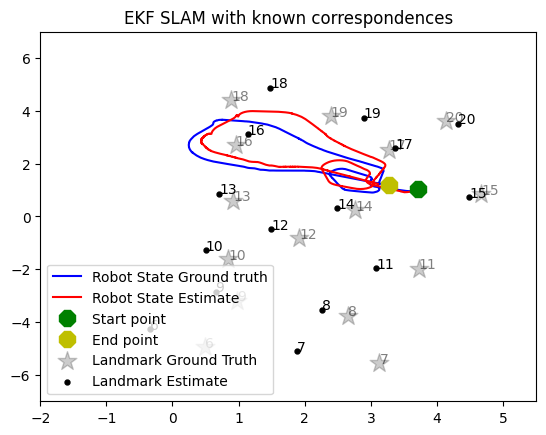

In [5]:
# State covariance matrix
R = np.diagflat(np.array([5.0, 5.0, 100.0])) ** 2
# Measurement covariance matrix
Q = np.diagflat(np.array([300.0, 300.0, 1e16])) ** 2

ekf_slam = EKF_SLAM_known_correspondences(dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=False)
plt.show()

### T2. Execute EKF SLAM with unknown correspondences
Test different datasets and analyze the performance of the algorithm

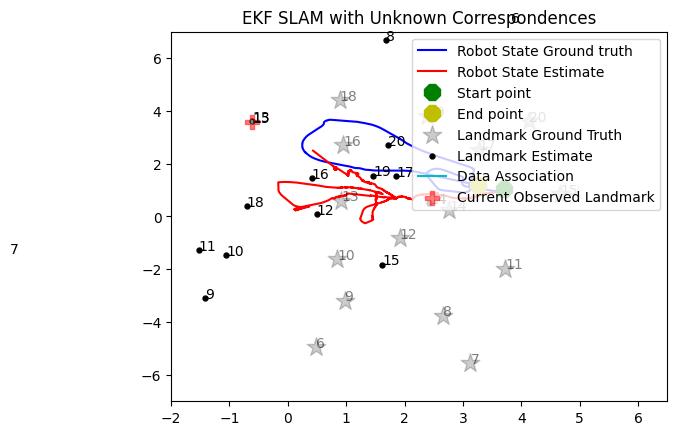

In [6]:
# State covariance matrix
R = np.diagflat(np.array([5.0, 5.0, 100.0])) ** 2
# Measurement covariance matrix
Q = np.diagflat(np.array([600.0, 600.0, 1e16])) ** 2

ekf_slam = EKF_SLAM_unknown_correspondences(dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=False)
plt.show()

In [7]:
dataset = "data/MRCLAM_Dataset4"
robot = 'Robot1' # Robot
start_frame = 0
end_frame = 16000

# Configs
R = np.diagflat(np.array([5.0, 5.0, 100.0])) ** 2
# Measurement covariance matrix
Q = np.diagflat(np.array([10000.0, 10000.0, 1e16])) ** 2

In [8]:
def test_execution_EKF_SLAM(known, conf_type, dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=False):
    if known:
        print(f"Params: {conf_type} Dataset: {dataset} Robot: {robot}")
        ekf_slam = EKF_SLAM_known_correspondences(dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=False)
        
    else:
        ekf_slam = EKF_SLAM_unknown_correspondences(dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=False)
        print(f"Params: {conf_type} Dataset: {dataset} Robot: {robot}")
    plt.show()

### T3. Iterate over diferent datasets
We are interested in retrieving the error metrics for multiple datasets and represent them in order to asses the performance of both methods.

#### Generate metrics

Params: BASE_EKF Dataset: data/MRCLAM_Dataset1 Robot: Robot1


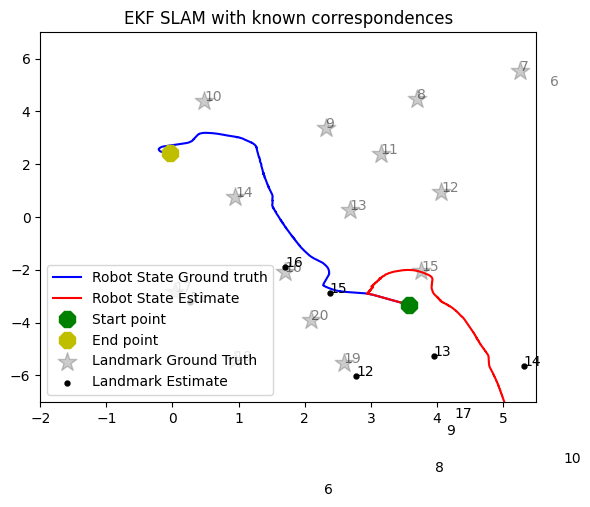

Params: EKF1 Dataset: data/MRCLAM_Dataset1 Robot: Robot1


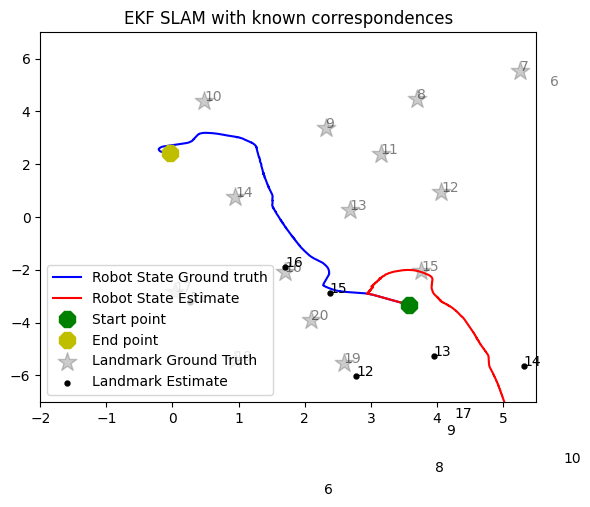

Params: EKF2 Dataset: data/MRCLAM_Dataset1 Robot: Robot1


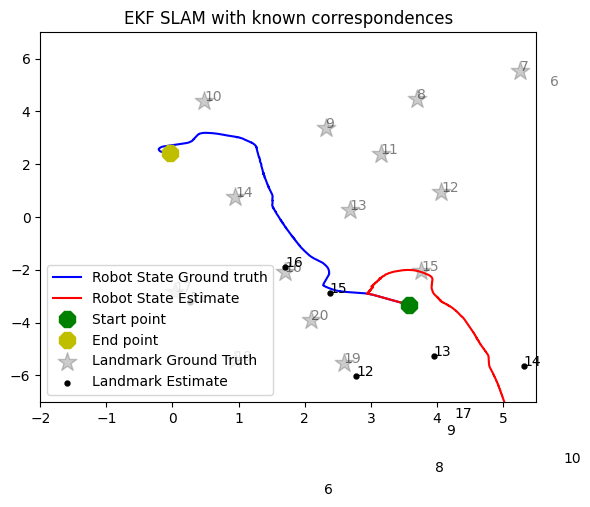

Params: EKF3 Dataset: data/MRCLAM_Dataset1 Robot: Robot1


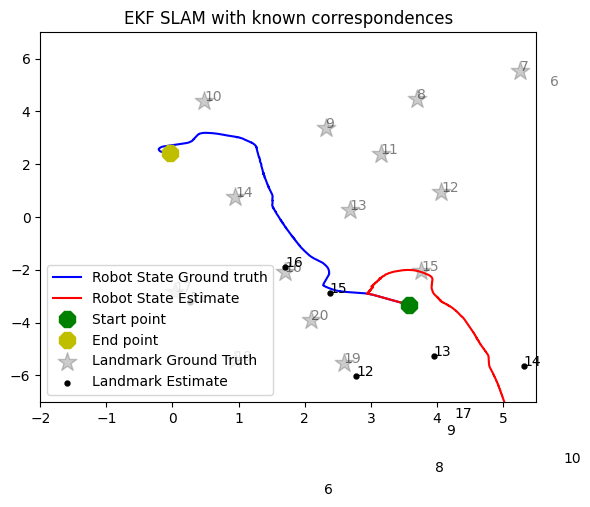

Params: BASE_EKF Dataset: data/MRCLAM_Dataset1 Robot: Robot2


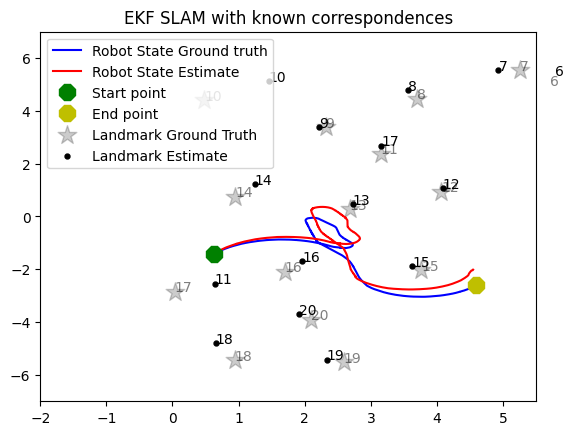

Params: EKF1 Dataset: data/MRCLAM_Dataset1 Robot: Robot2


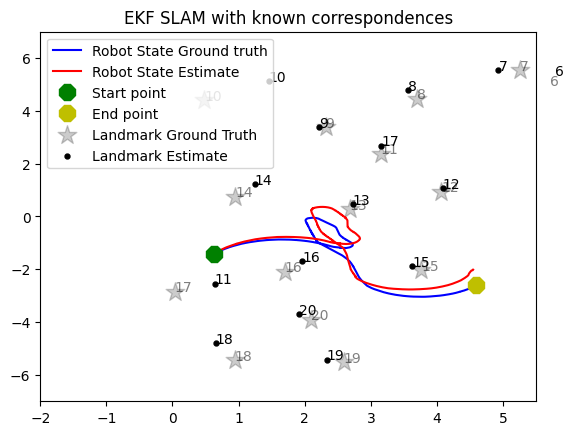

Params: EKF2 Dataset: data/MRCLAM_Dataset1 Robot: Robot2


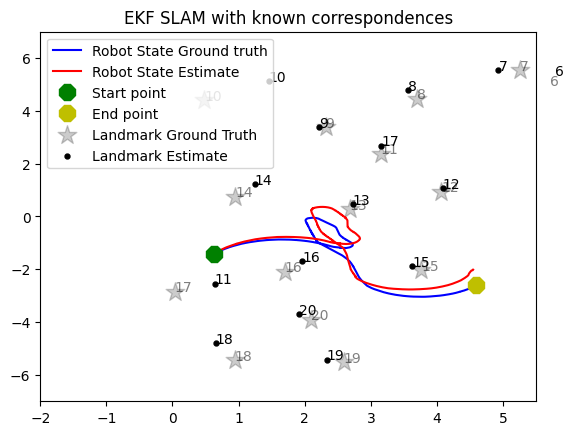

Params: EKF3 Dataset: data/MRCLAM_Dataset1 Robot: Robot2


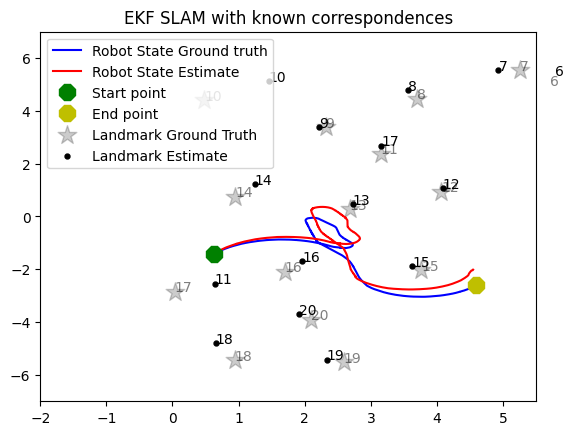

Params: BASE_EKF Dataset: data/MRCLAM_Dataset1 Robot: Robot3


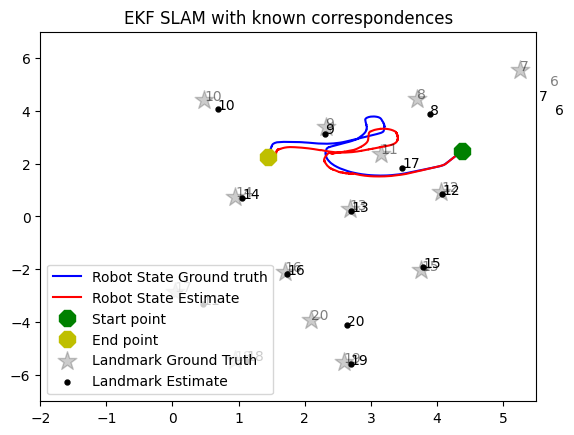

Params: EKF1 Dataset: data/MRCLAM_Dataset1 Robot: Robot3


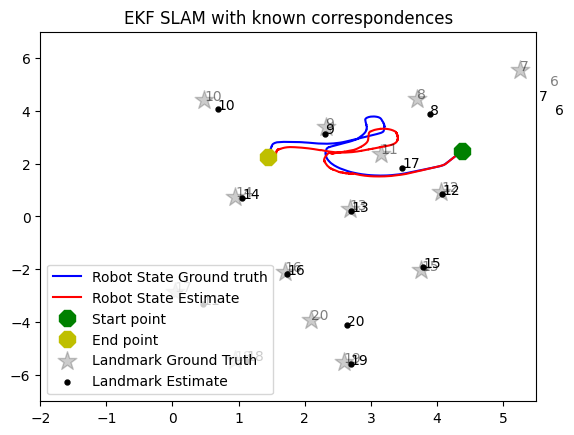

Params: EKF2 Dataset: data/MRCLAM_Dataset1 Robot: Robot3


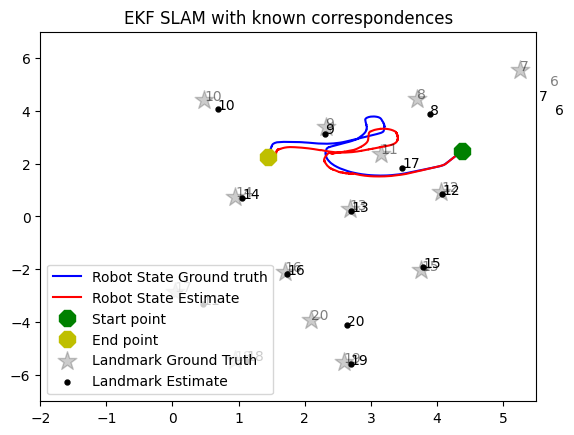

Params: EKF3 Dataset: data/MRCLAM_Dataset1 Robot: Robot3


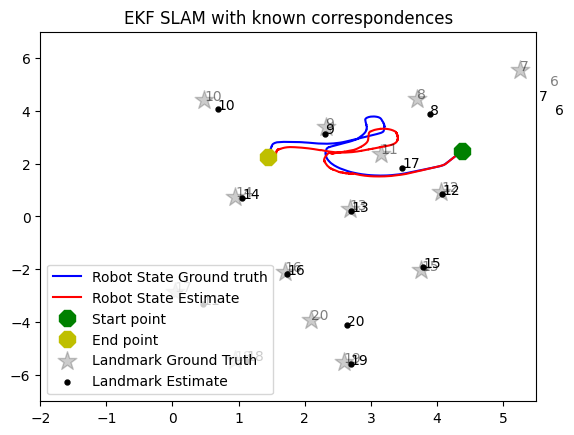

Params: BASE_EKF Dataset: data/MRCLAM_Dataset1 Robot: Robot4


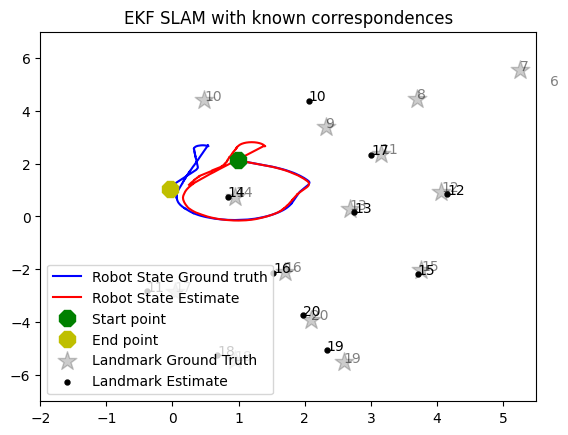

Params: EKF1 Dataset: data/MRCLAM_Dataset1 Robot: Robot4


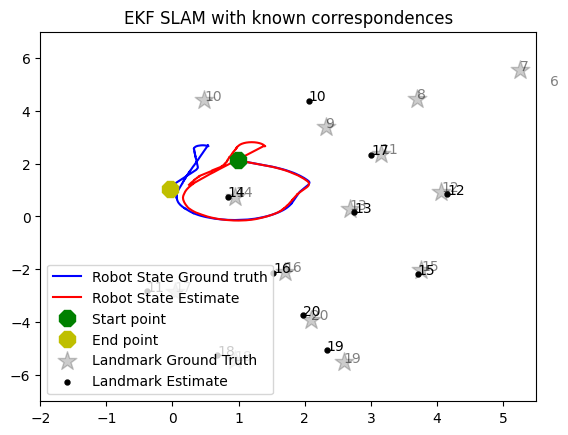

Params: EKF2 Dataset: data/MRCLAM_Dataset1 Robot: Robot4


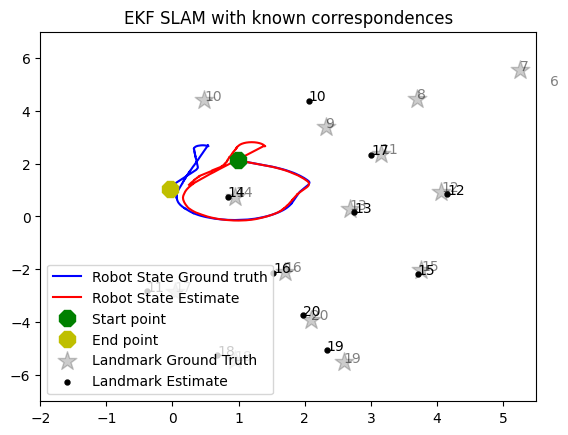

Params: EKF3 Dataset: data/MRCLAM_Dataset1 Robot: Robot4


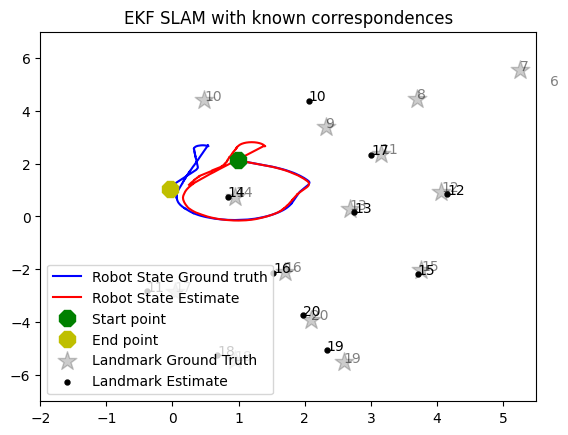

Params: BASE_EKF Dataset: data/MRCLAM_Dataset2 Robot: Robot1


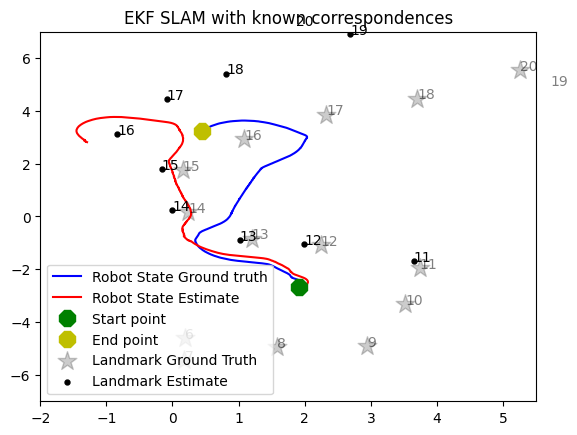

Params: EKF1 Dataset: data/MRCLAM_Dataset2 Robot: Robot1


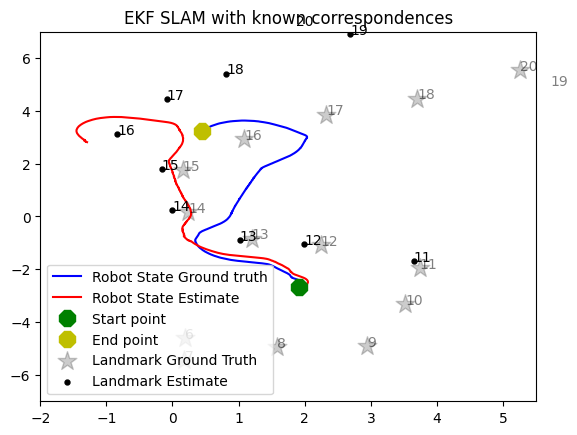

Params: EKF2 Dataset: data/MRCLAM_Dataset2 Robot: Robot1


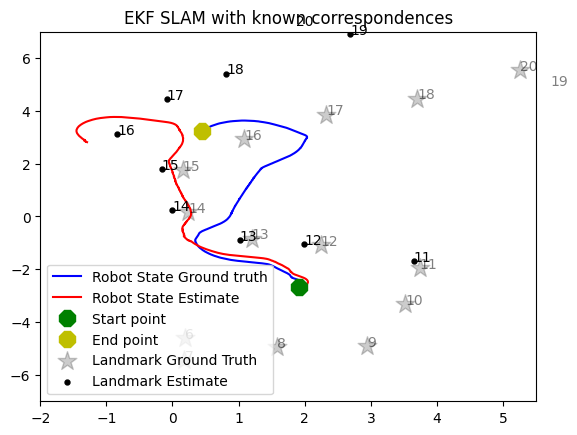

Params: EKF3 Dataset: data/MRCLAM_Dataset2 Robot: Robot1


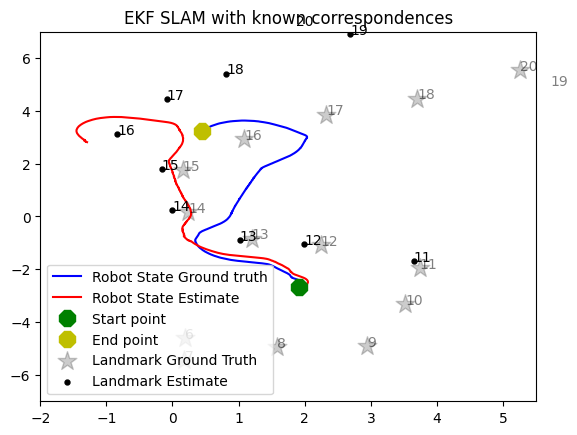

Params: BASE_EKF Dataset: data/MRCLAM_Dataset2 Robot: Robot2


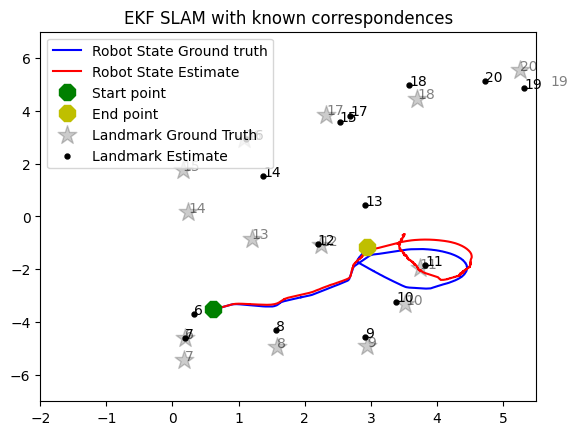

Params: EKF1 Dataset: data/MRCLAM_Dataset2 Robot: Robot2


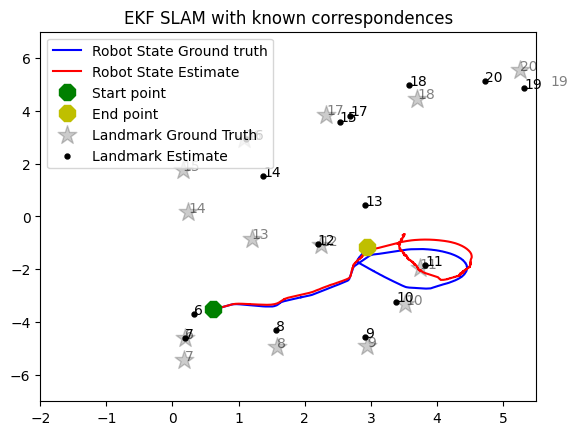

Params: EKF2 Dataset: data/MRCLAM_Dataset2 Robot: Robot2


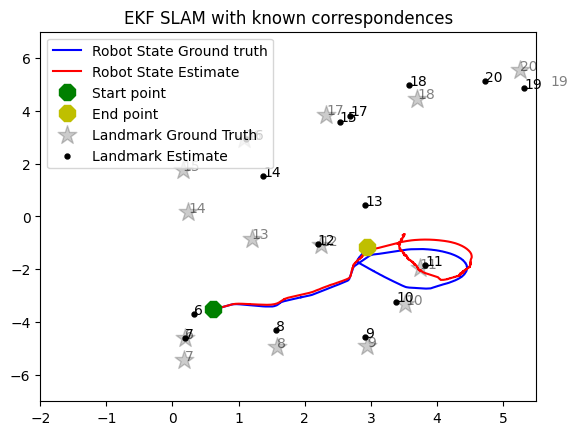

Params: EKF3 Dataset: data/MRCLAM_Dataset2 Robot: Robot2


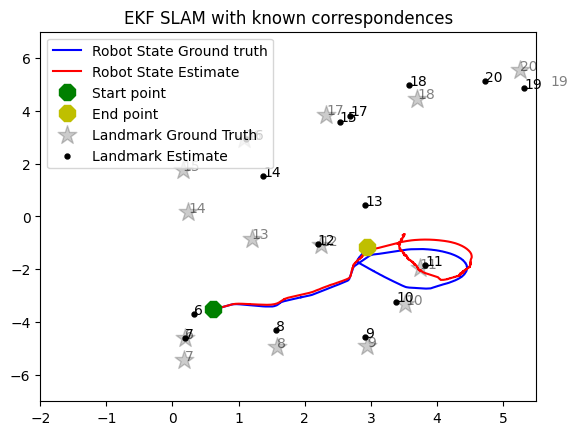

Params: BASE_EKF Dataset: data/MRCLAM_Dataset2 Robot: Robot3


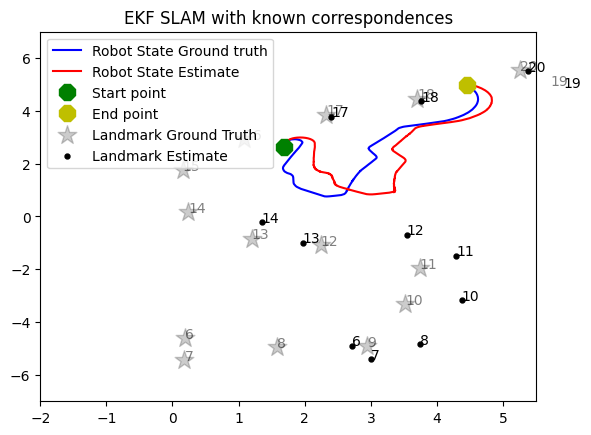

Params: EKF1 Dataset: data/MRCLAM_Dataset2 Robot: Robot3


KeyboardInterrupt: 

In [13]:
datasets = ["data/MRCLAM_Dataset1",
            "data/MRCLAM_Dataset2",
            "data/MRCLAM_Dataset3",
            "data/MRCLAM_Dataset4"]
robots = ['Robot1',
          'Robot2',
          'Robot3',
          'Robot4']

# errors = pd.DataFrame(columns=['dataset','robot','path_error','max_error','final_error'])

models = {
    'BASE_EKF': {
        'type' : 'EKF',
        'R': np.diagflat(np.array([5.0, 5.0, 100.0])) ** 2,
        'Q': np.diagflat(np.array([300, 300, 1e16]))** 2
    },
    'EKF1': {
        'type' : 'EKF',
        'R': np.diagflat(np.array([0.0, 1, 100]))** 2,
        'Q': np.diagflat(np.array([100, 50, 1e16]))** 2
    },
    'EKF2': {
        'type' : 'EKF',
        'R': np.diagflat(np.array([2, 2, 200]))** 2,
        'Q': np.diagflat(np.array([1000, 1000, 0.1]))** 2
    },
    'EKF3': {
        'type' : 'EKF',
        'R': np.diagflat(np.array([.001, .1, 1000]))** 2,
        'Q': np.diagflat(np.array([10, 10, 1e20]))** 2
    }, 
}

start_frame = 0
end_frame = 10000

for ds in datasets:
    for rob in robots:
        for k, v in models.items():
            test_execution_EKF_SLAM(True, k, ds, rob, start_frame, end_frame, R, Q, plot=True, plot_inter=False)

#### Represent metrics

In [10]:
# Represent metrics for all experiments

#### Analize metrics

In [11]:
# Analize the results and provide the mean error metrics across the experiments performed.